In [ ]:
import numpy as np
import mne
%matplotlib qt

Channels marked as bad:
none
Channels marked as bad:
[np.str_('CH_1')]
Channels marked as bad:
[np.str_('CH_3')]
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none


## Inspecting Raw Data

| Code | Description |
| --- | --- |
| `mne.datasets.sample.data_path()` | Download the MNE sample data and return the path where it is stored |
| `raw = mne.io.read_raw_fif("recording.fif")` | Read raw data from a FIF file and store it in the varibale `raw`|
| `raw.info` | Get the `.info` of the `raw` object |
| `raw.info["ch_names"]` | Get the list of channel names from `raw.info` |
| `raw.info["bads"]` | Get the list of bad channels from `raw.info` |
| `raw.info["sfreq"]` | Get the sampling frequency from `raw.info` |
| `raw.plot()` | Create an interactive plot of the `raw` data |
| `raw.times` | Get the array of `.times` for all samples in `raw` |
| `raw.get_data()` | Get the data array from `raw` |


Execute the cell below to download sample data from MNE and store it in the variable `raw`.

In [ ]:
data_path = mne.datasets.sample.data_path()
raw = mne.io.read_raw_fif(data_path/"MEG"/"sample"/"sample_audvis_raw.fif")

**Exercise**: Get the `.info` of the `raw` object.

In [ ]:
raw.info

**Example**: Get the sampling frequency (`"sfreq"`) from `raw.info`.

In [ ]:
raw.info["sfreq"]

**Exercise**: Get the list of channel names (`"ch_names"`) from `raw.info`.

In [ ]:
raw.info["ch_names"]

**Exercise**: Get the list of bad channels (`"bads"`) from `raw.info`.

In [ ]:
raw.info["bads"]

**Exercise**: Plot the raw data. Use the sidebar to scroll though channels and the left and right arrow keys to move through time to get an overview of the data.

In [ ]:
raw.plot()

**Exercise**: Get the array of `.times` from the `raw` object.

In [ ]:
raw.times

**Exercise**: Get the data array from `raw`.

In [ ]:
raw.get_data()

## Selecting Channels and Cropping Data

| Code | Description |
| --- | --- |
| `picks = mne.pick_types(raw.info, eeg=True)` | Pick all `eeg` channels from `raw.info` and store their indices in `picks` |
| `picks = mne.pick_types(raw.info, meg=True)` | Pick all `meg` channels from `raw.info` and store their indices in `picks` |
| `picks = mne.pick_channels(raw.info["ch_names"], include=["EEG 001", "EEG 002"])` | Pick the channels `"EEG 001"` and `"EEG 002"` from `raw.info` and store their indices in `picks` |
| `raw.pick(picks)` | Only keep the channels selected in `picks` |
| `raw.crop(tmin=10, tmax=20)` | Crop the data recorded between `10` and `20` seconds |
| `raw2 = raw.copy()` | Create a copy of `raw` and store it in the variable `raw2` |


**Example**: Pick all `eeg`, `stim` and `eog` channels from `raw.info`.

In [ ]:
picks = mne.pick_types(raw.info, eeg=True, stim=True, eog=True)
picks

**Example**: Create a copy of `raw` called `raw_eeg` and only keep the channels selected in `picks`.

In [ ]:
raw_eeg = raw.copy()
raw_eeg.pick(picks)

**Exercise**: Pick all `meg`, `stim` and `eog` channels from `raw.info`.

In [ ]:
picks = mne.pick_types(raw.info, meg=True, stim=True, eog=True)
picks

**Exercise**: Create a copy of `raw` called `raw_meg` and only keep the channels selected in `picks`.

In [ ]:
raw_meg = raw.copy()
raw_meg.pick(picks)

**Example**: Plot all magnetometer sensors with their names.

In [ ]:
raw.plot_sensors(ch_type="mag", show_names=True)

**Exercise**: Plot all EEG sensors with their names.

In [ ]:
raw.plot_sensors(ch_type="eeg", show_names=True)

**Example**: Pick the channels in the list `left` from `raw.info["ch_names"]`.

In [ ]:
left = ["EEG 017", "EEG 018", "EEG 025", "EEG 026"]
picks = mne.pick_channels(raw.info["ch_names"], include=left)

**Example**: Create a copy of `raw` called `raw_eeg_left` and only keep the channels selected in `picks`.

In [ ]:
raw_eeg_left = raw.copy()
raw_eeg_left.pick(picks)

**Exercise**: Pick the channels in the list `right` from `raw.info["ch_names"]`.

In [ ]:
right = ["EEG 023", "EEG 024", "EEG 034", "EEG 035"]

In [ ]:
picks = mne.pick_channels(raw.info["ch_names"], include=right)

**Exercise**: Create a copy of `raw` called `raw_eeg_right` and only keep the channels selected in `picks`.

In [ ]:
raw_eeg_right = raw.copy()
raw_eeg_right.pick(picks)

In [ ]:
first_minute = raw.copy()
first_minute.crop(tmin=0, tmax=60)

**Example**: Create a copy of `raw` called `raw_min1` and crop it to the data recorded within the first minute.

In [ ]:
raw_min1= raw.copy()
raw_min1.crop(tmin=60, tmax=120)

**Exercise**: Create a copy of `raw` called `raw_min2` and crop it to the data recorded within the second minute.

In [ ]:
raw_min2= raw.copy()
raw_min2.crop(tmin=60, tmax=120)

In [ ]:
raw = mne.io.read_raw_ctf(raw_path)
raw.plot()

## Loading Data from Different Device-Formats

| Code | Description |
| --- | --- |
| `mne.io.read_raw_ctf(raw_path)` | Read raw MEG data from the CTF format |
| `mne.io.read_raw_bti(raw_path)` | Read raw MEG data from the 4D Neuroimaging/BTI format |
| `mne.io.read_raw_brainvision(raw_path, preload=True)` | Read raw EEG data from the Brainvision format and preload the data into memory |
| `mne.io.read_raw_edf(raw_path, verbose=False)` | Read raw EEG data from the EDF format without verbose output|



**Exercise**: Read the raw MEG data stored in the CTF format from the `raw_path` defined below and plot it.

In [ ]:
data_path = mne.datasets.brainstorm.bst_raw.data_path()
raw_path = data_path / "MEG" / "bst_raw" / "subj001_somatosensory_20111109_01_AUX-f.ds"

In [ ]:
raw = mne.io.read_raw_ctf(raw_path)
raw.plot()

**Exercise**: Read the raw MEG data stored in the 4D Neuroimaging/BTI format from the `raw_path` defined below and plot it.

In [ ]:
data_path = mne.datasets.phantom_4dbti.data_path()
raw_path = data_path / "1" /"e,rfhp1.0Hz"

In [ ]:
raw = mne.io.read_raw_bti(raw_path)
raw.plot()

**Exercise**: Read the raw EEG data stored in the Brainvision format from the `raw_path` defined below with `preload=True` and plot it.

In [45]:
data_path = mne.datasets.ssvep.data_path()
raw_path = data_path / "sub-02" / "ses-01" / "eeg" / "sub-02_ses-01_task-ssvep_eeg.vhdr"


Extracting parameters from /home/olebi/mne_data/ssvep-example-data/sub-02/ses-01/eeg/sub-02_ses-01_task-ssvep_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 467579  =      0.000 ...   467.579 secs...


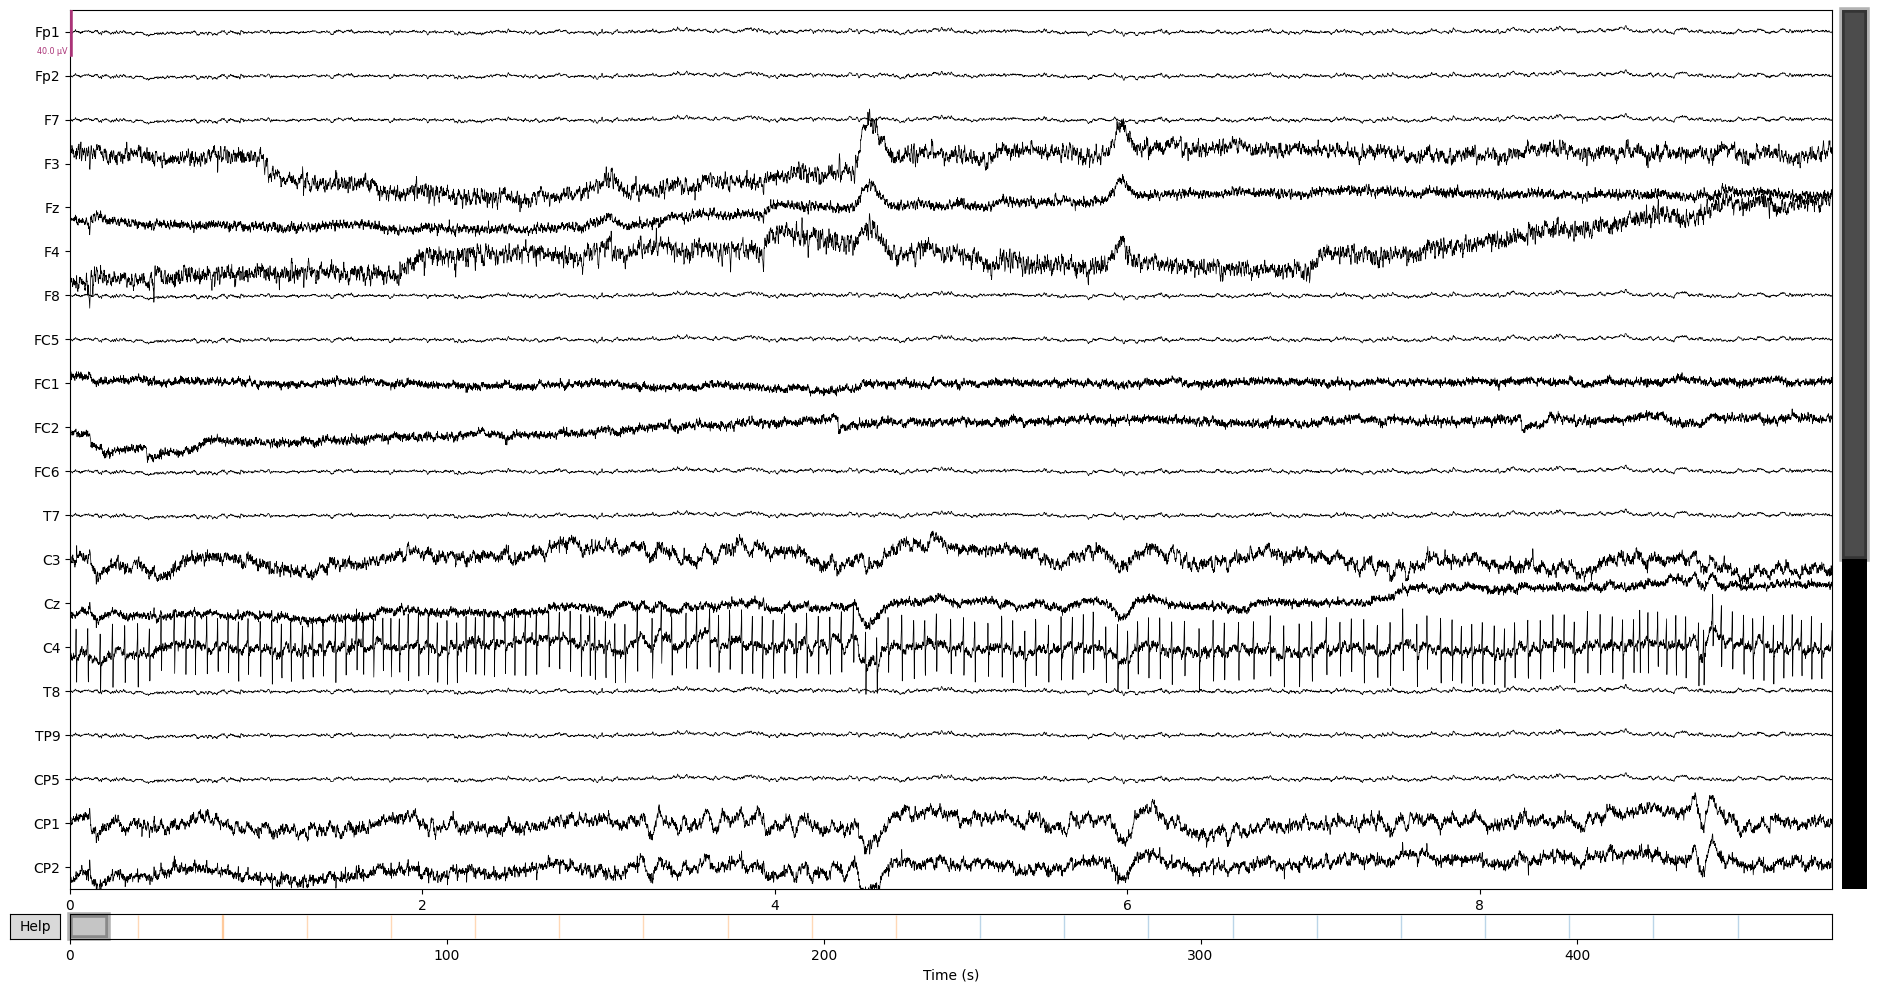

In [46]:
raw = mne.io.read_raw_brainvision(raw_path, preload=True)
raw.plot()

**Exercise**: Read the raw EEG data stored in the EDF format from the `raw_path` defined below with `preload=True` and `verbose=False` and plot it.

In [47]:
raw_path = mne.datasets.eegbci.load_data(subjects=1, runs=6)[0]

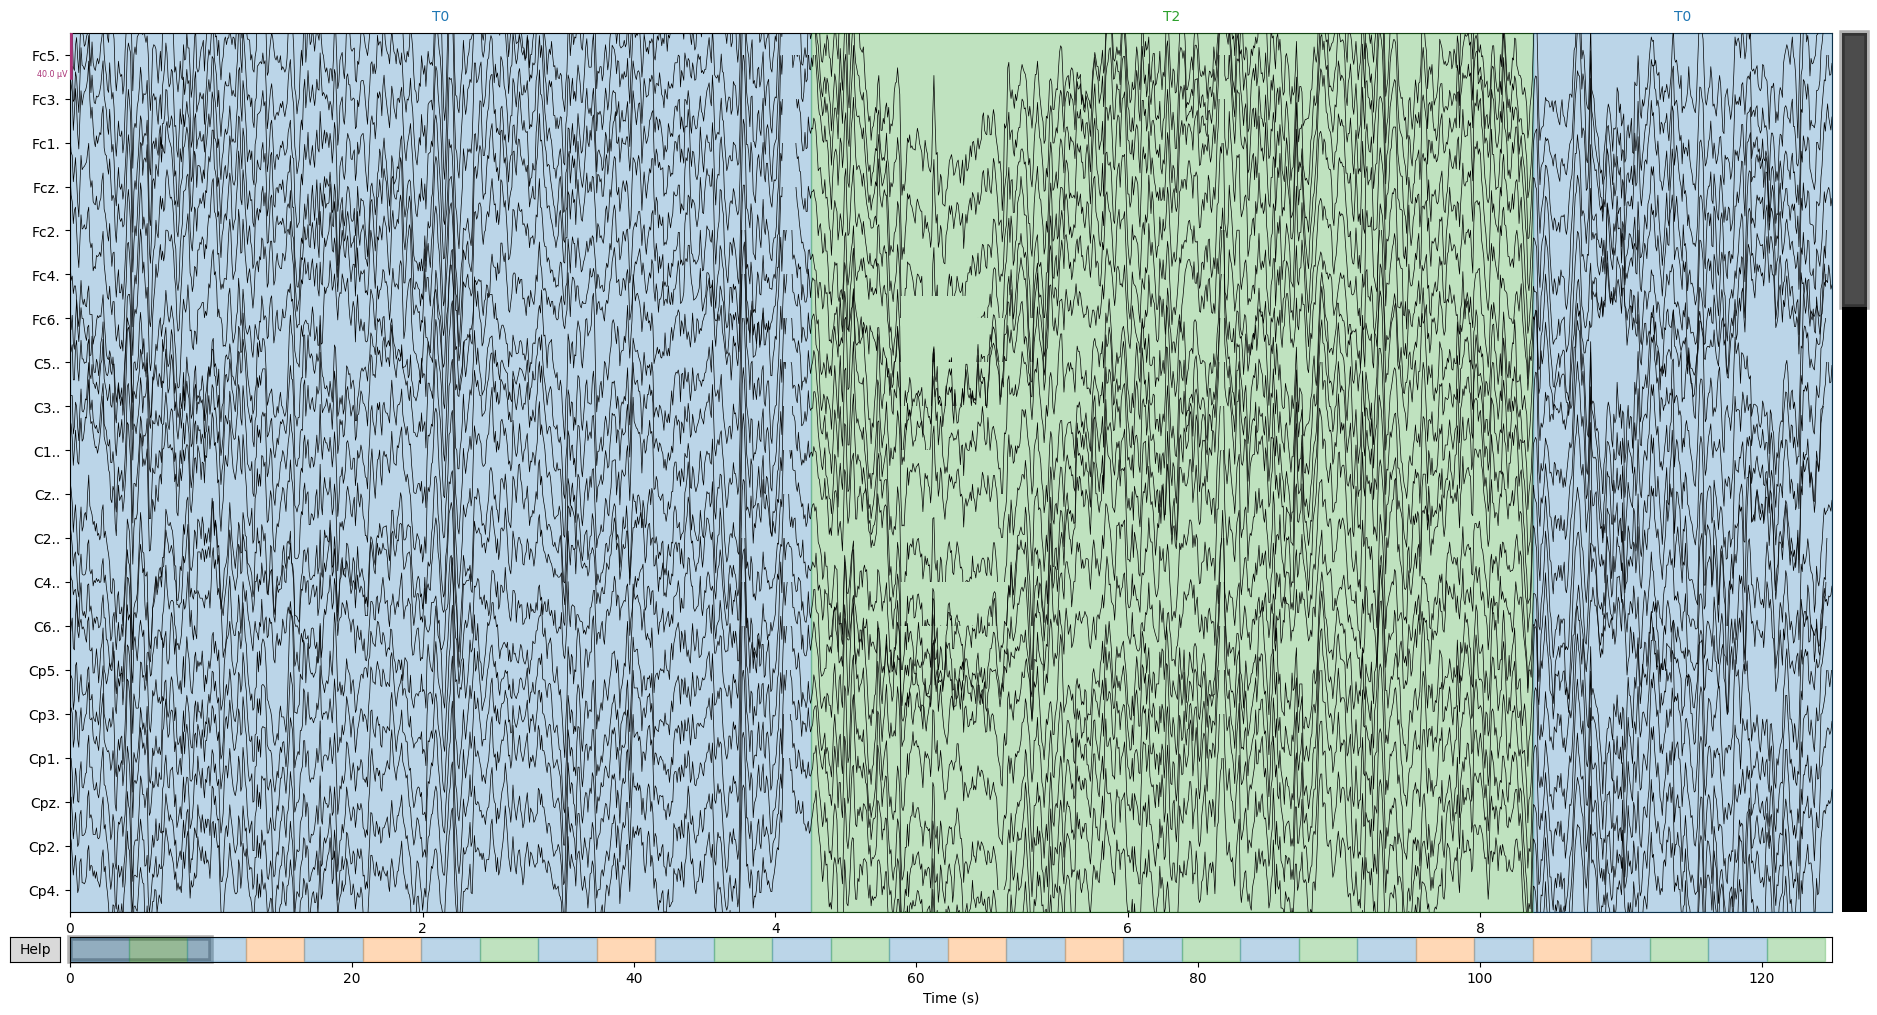

In [48]:
raw = mne.io.read_raw_edf(raw_path, preload=True, verbose=False)
raw.plot()

**Optional**: Delete the `mne_data/` folder in your home directory to remove the downloaded sample data and free up space.

## Creating a RawArray from Scratch

| Code | Description |
| --- | --- |
| `np.random.randn(10)` | Generate `10` random numbers |
| `np.random.randn(5, 10)` | Generate a `5`-by-`10` matrix of random numbers |
| `mne.create_info(ch_names=["a", "b"], ch_types="eeg", sfreq=512` | Generate and info object for two `"eeg"` channels names `"a"` and `"b"` with a sampling frequency of `512` |
| `mne.create_info(ch_names=["a", "b"], ch_types=["mag", "grad"], sfreq=512` | Generate and info object for two channels where the first is a magnetometer and the second a gradiometer|
| `raw = mne.io.RawArray(data, info)` | Generate a `raw` data object from the `data` with the given `info` |
| `raw.plot()` | Plot the `raw` data |
| `raw.info` | Get the `.info` object from `raw` |
| `raw.get_data()` | Get the data array from `raw` |


Execute the cell below to generate some dummy data. MNE always expects data to have the shape `(n_channels, n_samples)`.

In [ ]:
n_channels = 3
n_samples = 1000
data = np.random.randn(n_channels, n_samples)
data.shape

(3, 1000)

**Example**: Create an `info` object for 3 EEG sensors with a sampling frequency of `100` Hz.

In [37]:
info = mne.create_info(ch_names=["CH_1", "CH_2", "CH_3"], ch_types="eeg", sfreq=100)
info

<Info | 7 non-empty values
 bads: []
 ch_names: CH_1, CH_2, CH_3
 chs: 3 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 3
 projs: []
 sfreq: 100.0 Hz
>

**Example**: Create a `RawArray` from `data` using the `info` created above and plot it. The scaling bar on the lfet shows the unit of the data.

Creating RawArray with float64 data, n_channels=3, n_times=1000
    Range : 0 ... 999 =      0.000 ...     9.990 secs
Ready.


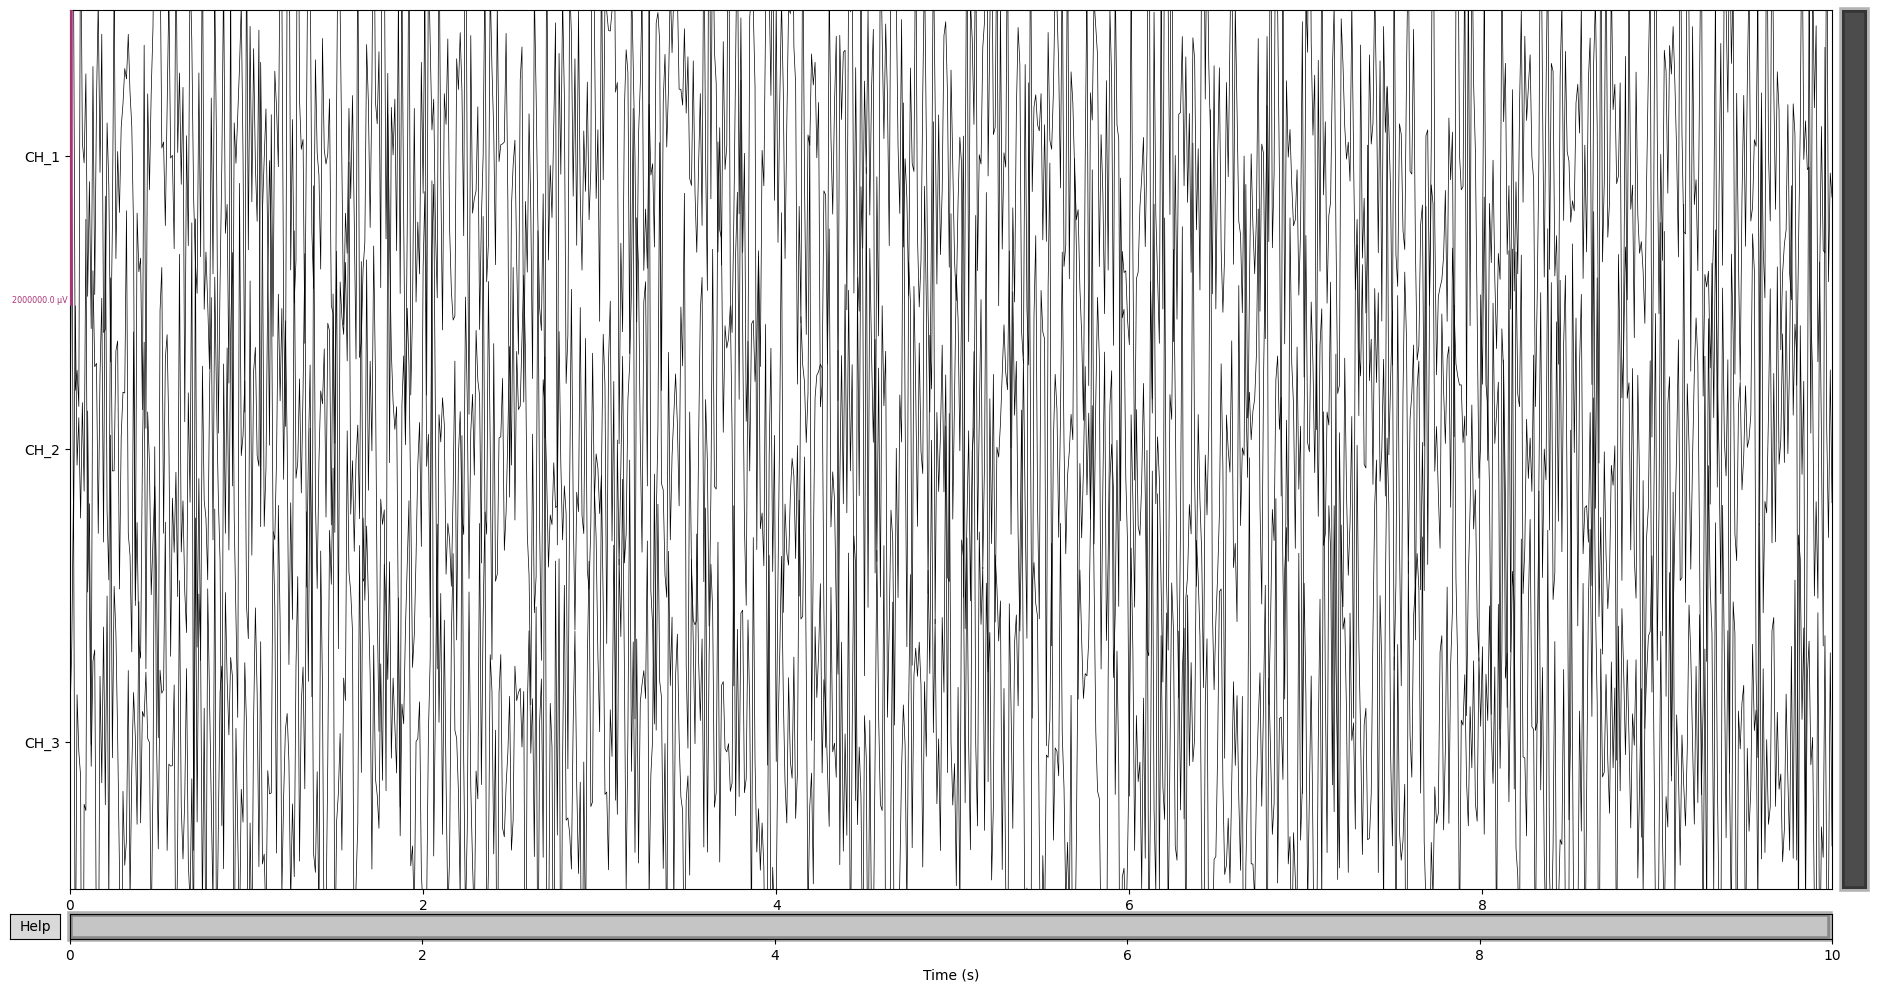

In [38]:
raw = mne.io.RawArray(data=data, info=info)
raw.plot(scalings="auto")

**Exercise**: Create an `info` object for 3 magnetometers (`"mag"`) with a sampling frequency of `256` Hz (you can use any channel names).

In [39]:
info = mne.create_info(ch_names=["CH_1", "CH_2", "CH_3"], ch_types="mag", sfreq=256)
info

<Info | 7 non-empty values
 bads: []
 ch_names: CH_1, CH_2, CH_3
 chs: 3 Magnetometers
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 3
 projs: []
 sfreq: 256.0 Hz
>

**Exercise**: Create a `RawArray` from `data` using the `info` created above and plot it. What is the unit of the data?

Creating RawArray with float64 data, n_channels=3, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.902 secs
Ready.


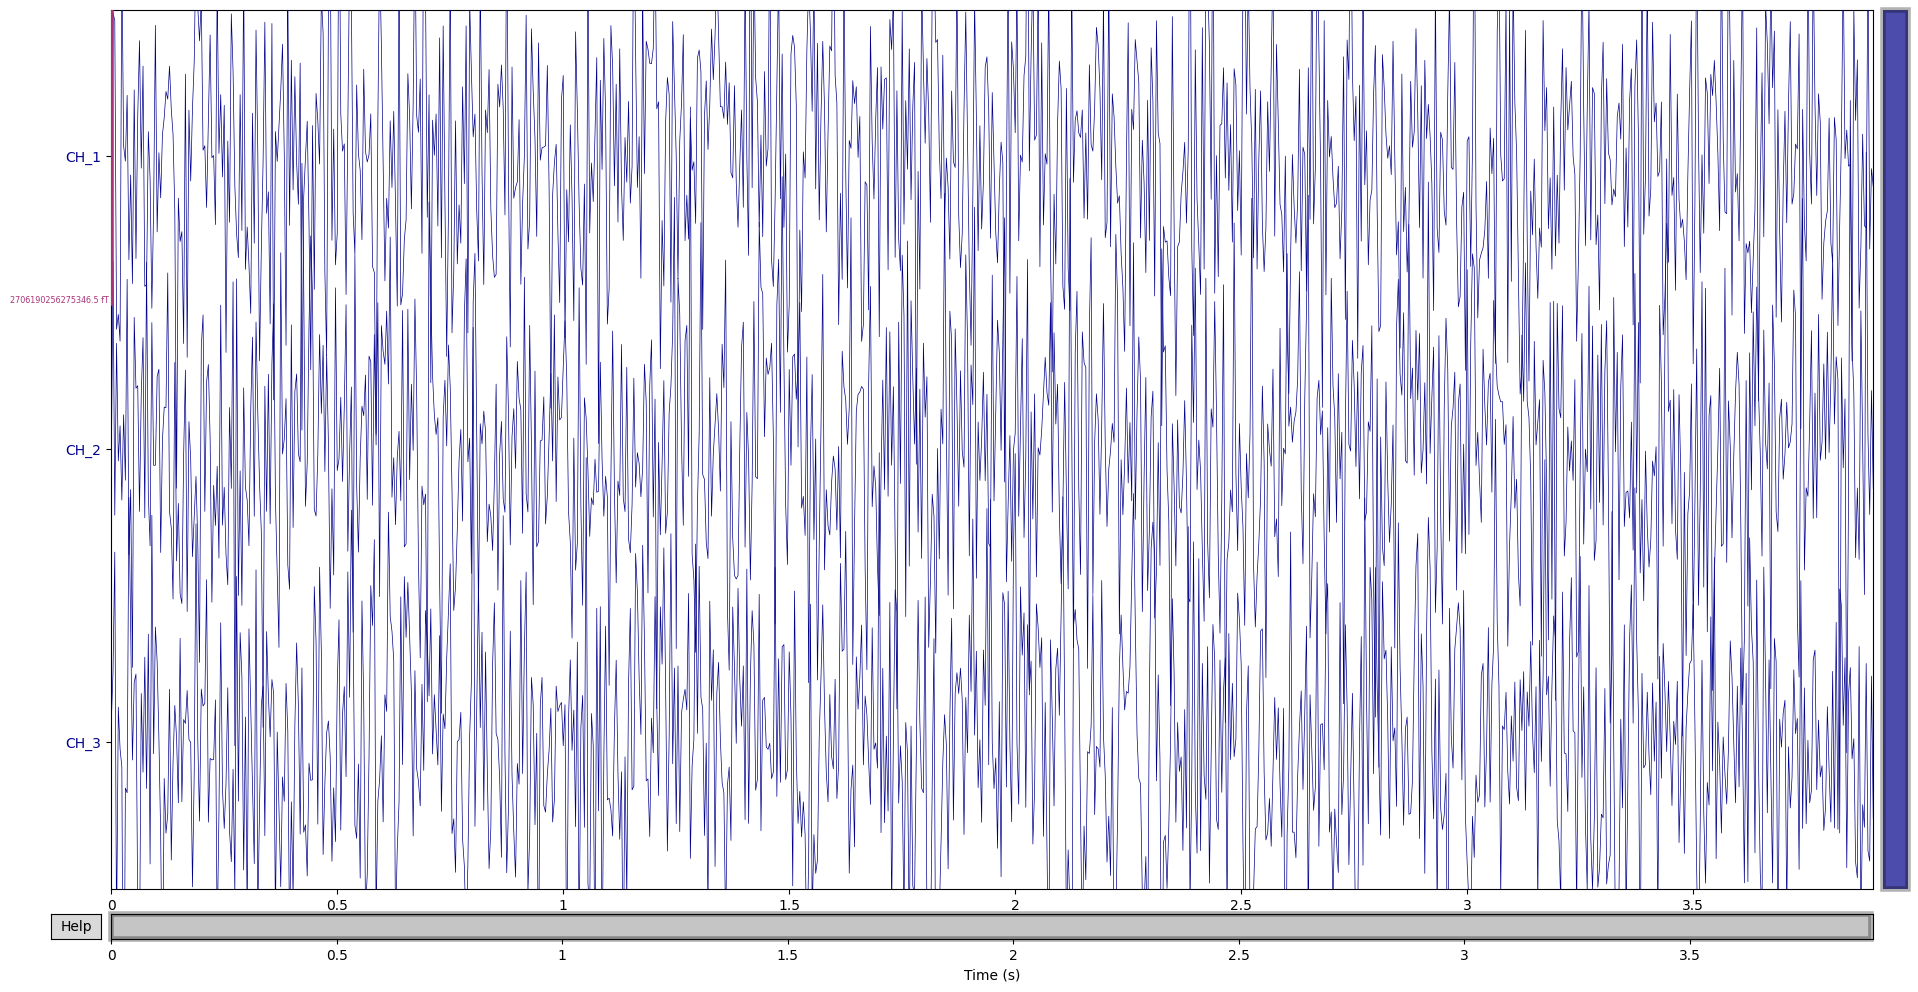

In [40]:
raw = mne.io.RawArray(data=data, info=info)
raw.plot(scalings="auto")

**Exercise:** Create an `info` object for 3 sensors, where the first is EEG (`"eeg"`), the second gradiometer (`"grad"`), and the third magnetometer (`"mag"`).

In [41]:
info = mne.create_info(ch_names=["CH_1", "CH_2", "CH_3"], ch_types=["eeg", "grad", "mag"], sfreq=256)
info

<Info | 7 non-empty values
 bads: []
 ch_names: CH_1, CH_2, CH_3
 chs: 1 EEG, 1 Gradiometers, 1 Magnetometers
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 3
 projs: []
 sfreq: 256.0 Hz
>

**Exercise**: Create a `RawArray` from `data` using the `info` created above and plot it. What is the unit of each sensor?

Creating RawArray with float64 data, n_channels=3, n_times=1000
    Range : 0 ... 999 =      0.000 ...     3.902 secs
Ready.


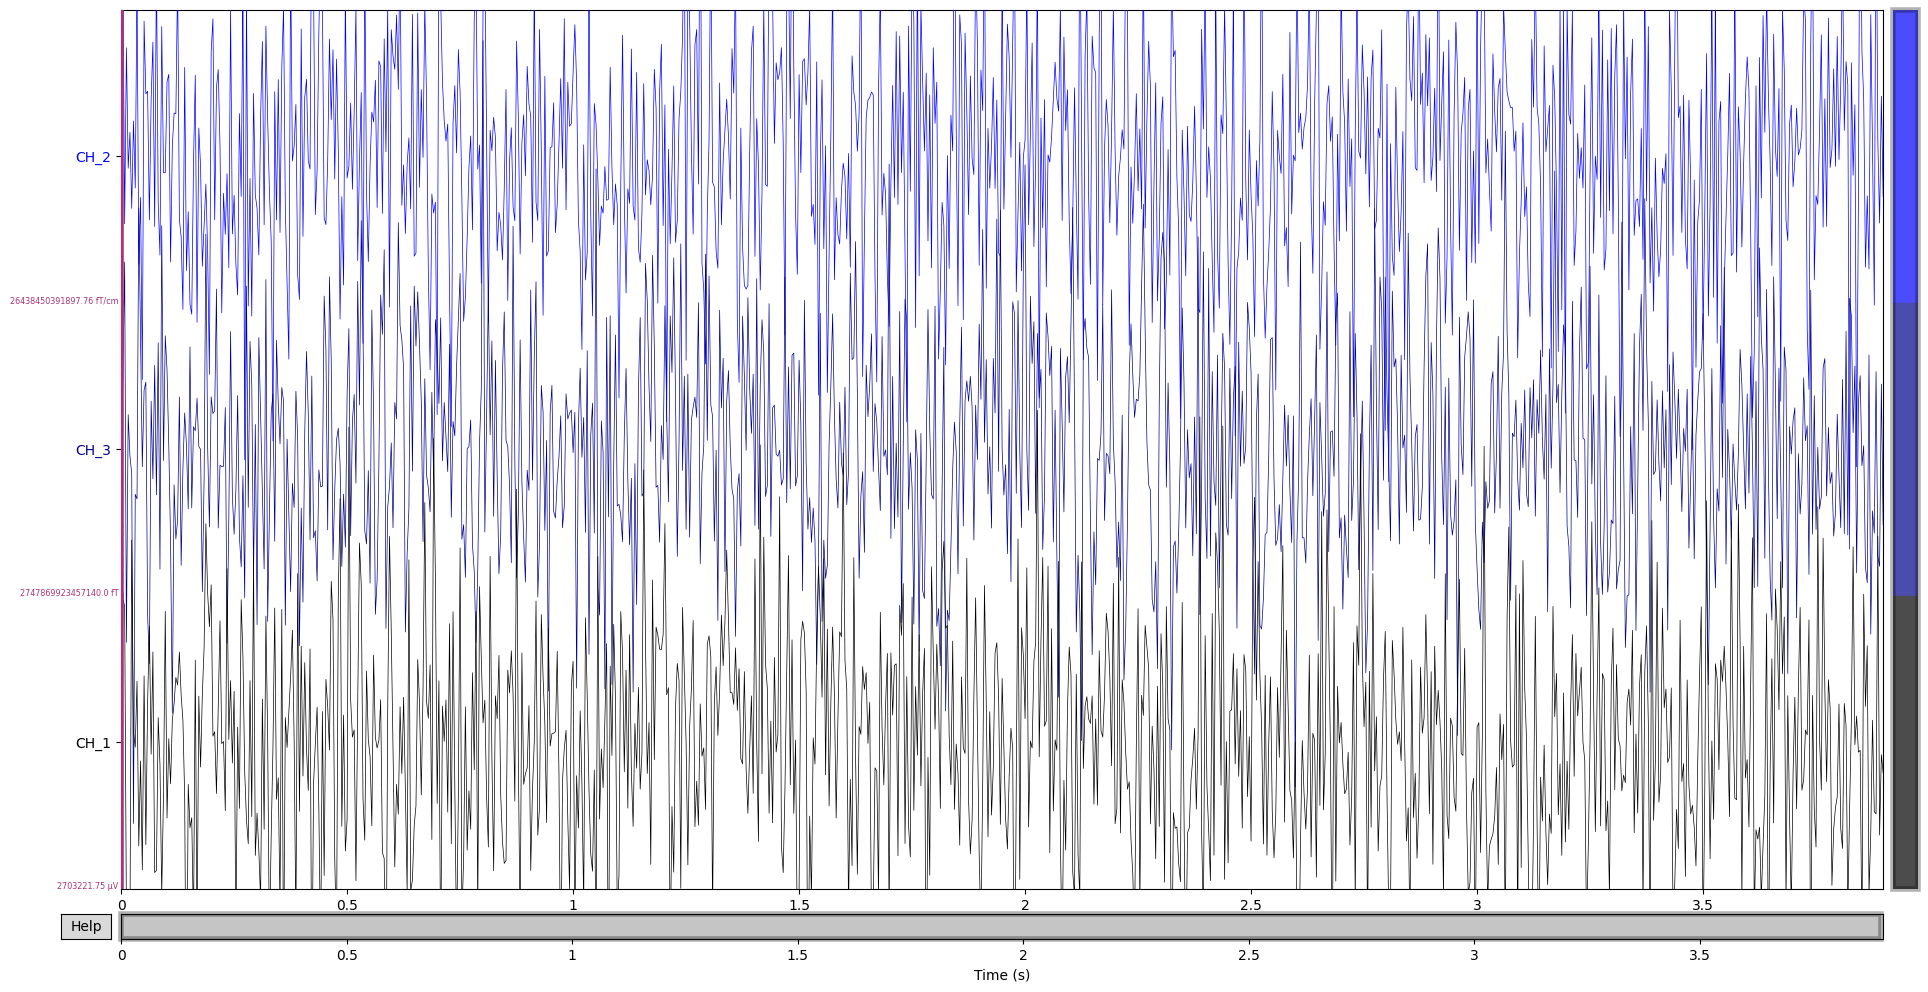

In [42]:
raw = mne.io.RawArray(data=data, info=info)
raw.plot(scalings="auto")

**Exercise**: Get the `.info` object from `raw` (this should be identical to the `info` object you created).

In [43]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: CH_1, CH_2, CH_3
 chs: 1 EEG, 1 Gradiometers, 1 Magnetometers
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 3
 projs: []
 sfreq: 256.0 Hz
>

**Exercise**: Get the data array from `raw` (this should be identical to the `data` array created in the beginning of this section).

In [44]:
raw.get_data()

array([[-0.75061472,  1.31635732,  1.24614003, ..., -0.12158654,
        -0.28654261, -1.57411525],
       [-0.27582174,  1.71965195, -0.62391278, ...,  0.52750927,
        -0.37949484, -0.96238284],
       [ 0.16018776,  0.64483048,  1.75018008, ...,  0.60489899,
        -0.71378709,  1.7459776 ]], shape=(3, 1000))